# 4.2.2.1 Decision Tree Classifier

## Introduction

A Decision Tree Classifier is a supervised machine learning algorithm that makes predictions by learning simple decision rules inferred from the data features. It's a tree-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). It's intuitive and easy to interpret, making it popular in various domains, including medicine, finance, and natural language processing.


### Decision Tree Classifier Algorithm

The Decision Tree classifier algorithm can be outlined in detail as follows:

1. **Start**: Begin with the entire dataset and a root node representing it.
   
2. **Attribute Selection**: 
   - Choose the best attribute among all available attributes to split the dataset. Common measures for this include:
     - **Information Gain**: Measures the reduction in entropy after the dataset is split on an attribute.
     - **Gini Index**: Measures the impurity of the dataset that is reduced by selecting a particular attribute.
     - **Gain Ratio**: Considers the intrinsic information of a split to the amount of information required to split the dataset.
   
3. **Splitting**: 
   - Divide the dataset into subsets that have the most significant attribute values in common.
   
4. **Recursive Tree Building**: 
   - Recursively apply the above steps to each subset until one of the stopping conditions is met, such as:
     - All instances in a node belong to the same class.
     - No further attributes remain to be selected.
     - Maximum tree depth is reached.
     - Minimum number of samples in a node is reached.
     - Other pruning conditions to prevent overfitting.

5. **Stopping Criteria**: 
   - Define criteria to stop further partitioning of a node such as reaching a specific depth, minimum samples, or purity threshold.

6. **Tree Pruning** (optional): 
   - Postpone some splits and use pruning to avoid overfitting the training data.

7. **Output**: 
   - The tree is constructed until all nodes are pure or the stopping criteria are met. Each leaf node represents a class label.

8. **Prediction**: 
   - To classify a new instance, traverse the tree from the root, applying the tests at each node based on the attribute values of the instance until a leaf node is reached, which predicts the class label.

This algorithm creates a tree-like structure where decisions are made at each internal node based on the attribute values, leading to the classification of instances into different classes at the leaf nodes.


___
### Readings:
- [Machine Learning Algorithms — Decision Tree Algorithm](https://towardsdev.com/machine-learning-algorithms-8-decision-tree-algorithm-533b6926ddbb)
- [How to Split a Decision Tree algorithm?](https://medium.com/nerd-for-tech/interview-question-what-are-the-different-methods-to-split-a-tree-in-a-decision-tree-algorithm-a191991e51cf)
- [Decision Trees: Introduction & Intuition](https://readmedium.com/en/https:/towardsdatascience.com/decision-trees-introduction-intuition-dac9592f4b7f)
___

### Example of Decision Tree Classifier

Consider a dataset of animals categorized by their features into different classes (e.g., mammal, reptile, bird). Let's construct a Decision Tree classifier to predict the class of an animal based on its features:

**Dataset:**
- Features:
  - Has fur? (yes/no)
  - Can fly? (yes/no)
- Labels:
  - Class: Mammal, Reptile, Bird

**Tree Construction:**
1. Start with the entire dataset.
2. Choose the attribute with the highest information gain (or other criterion) to split the dataset (e.g., "Can fly?").
3. Split the dataset into subsets based on the chosen attribute.
4. Recursively apply the splitting process to each subset until the stopping criteria are met (e.g., all instances in a node belong to the same class).

**Example Decision Rules:**
```
- IF Can fly? = yes
  - THEN Class = Bird
- ELSE IF Has fur? = yes
  - THEN Class = Mammal
- ELSE
  - Class = Reptile
```
In this example, the Decision Tree classifier predicts:
- If an animal can fly, it predicts it as a Bird.
- If an animal cannot fly but has fur, it predicts it as a Mammal.
- If an animal cannot fly and does not have fur, it predicts it as a Reptile.

This demonstrates how a Decision Tree classifier uses simple decision rules based on features to classify instances into different classes.


In [1]:
# Load necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


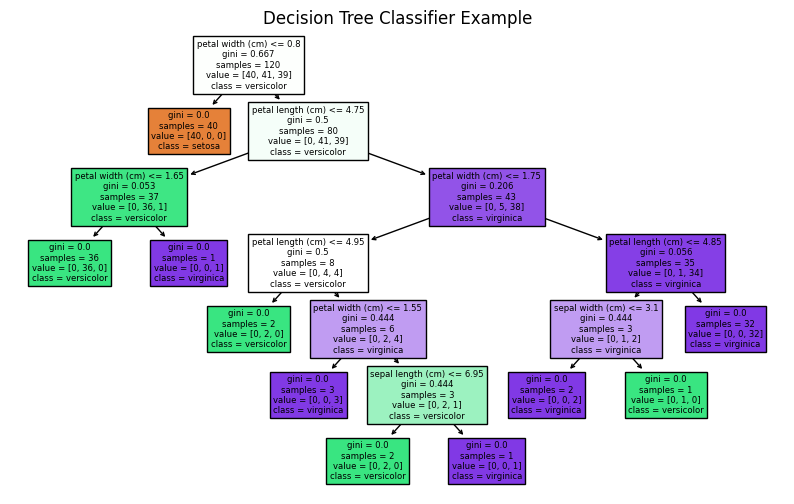

In [5]:
# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Classifier Example")
plt.show()

In [6]:
# Example predictions
example_features = [[1.2, 3.4, 5.6, 2.1], [5.6, 2.7, 4.2, 1.3]]
predictions = clf.predict(example_features)
print("Example Predictions:")
for i, pred in enumerate(predictions):
    print(f"Example {i+1}: Predicted class is {target_names[pred]}")

Example Predictions:
Example 1: Predicted class is virginica
Example 2: Predicted class is versicolor


In [7]:
# Display text representation of the Decision Tree
tree_rules = export_text(clf, feature_names=feature_names)
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
| 

## Conclusion

Decision Tree Classifiers are powerful tools for both classification and regression tasks due to their simplicity and interpretability. They can handle both numerical and categorical data, perform well with large datasets, and are robust to outliers. However, they can overfit if not pruned properly, and their performance may degrade with correlated features. Overall, Decision Trees are valuable in understanding data relationships and making predictions based on learned decision rules.
